# MoSe2

In [96]:
import  pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import numpy as np
from numpy import array, reshape, zeros, append, arange
import math
from math import log, e, pi
import numpy
from sys import argv

# Formation energy as  chemical potential vary


In [97]:
pi=numpy.pi
convert=29979245800.0*2*pi # cm^-1 to Hz

 #### Total Energies in eV

In [98]:
E0=-6108318.476328624 # pristine
E1=-6174864.306138340 # addon S
E2=-6041768.483695555 # mono S vacancy
E3=-5975218.839354995 # di S vacancy up&down
E4=-5975218.551673065 # di S vacancy neighboring
E5=-5997073.704 # mono Mo vacancy
E_MoSe2=-244332.785924554 # primtitive
ESe8=-532375.657399940   #8 atoms in unitcell
EMo=-222473.348568306  # Total energy in eV

In [99]:
d0=pd.read_csv('w0', sep='\s+',header=0)
d1=pd.read_csv('addS', sep='\s+',header=0)
d2=pd.read_csv('VS', sep='\s+',header=0)
d3=pd.read_csv('VS2', sep='\s+',header=0)
d4=pd.read_csv('VS22', sep='\s+',header=0)
d5=pd.read_csv('VMo', sep='\s+',header=0)
dW=pd.read_csv('Mo_BCC', sep='\s+',header=0)
dSe=pd.read_csv('w_Se8', sep='\s+',header=0)
wSe=dSe['x']*convert
wW=dW['x']*convert # kj/mol to eV
w0=d0['w0']*convert
w1=d1['addS']*convert
w2=d2['VS']*convert
w3=d3['VS2']*convert
w4=d4['VS22']*convert
w5=d5['VMo']*convert #THZ to Hz

In [100]:
p01=1
T=1000
p=80928.077 # 1.89e-3 atm (atm to cgs * 1013250))
p0=1013250  # atm to g/(cm s^2) 
kk=1.380649e-16 # erg/k (cm^2.g/ks^2)
k=8.617333262145e-05 # ev/k
h=6.62607015e-27  # erg.s 
hb=6.582119569e-16 # eV.s
hbar=1.054571817e-27 # erg.s
sigma=8
m=1.04907603472e-21
IA=4.149045888664045e-37 
IB=4.149088585718857e-37
IC=7.612594467348306e-37

In [101]:
pi=numpy.pi
convert=29979245800.0*2*pi # cm^-1 to Hz

[2000 2010 2020 2030 2040 2050 2060 2070 2080 2090 2100 2110 2120 2130
 2140 2150 2160 2170 2180 2190 2200 2210 2220 2230 2240 2250 2260 2270
 2280 2290 2300 2310 2320 2330 2340 2350 2360 2370 2380 2390 2400 2410
 2420 2430 2440 2450 2460 2470 2480 2490 2500 2510 2520 2530 2540 2550
 2560 2570 2580 2590]


<function matplotlib.pyplot.show(close=None, block=None)>

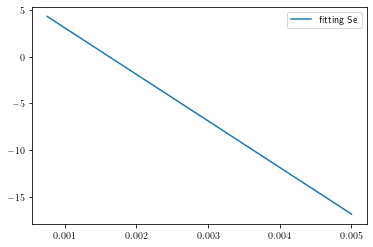

In [102]:
xr=np.array(np.arange(199.85,1326.85,10))

xw=np.array(np.arange(2000,2600,10))
print(xw)
xr=1/xr
xw=1/xw
yr=(8.0886-(4989.5*xr))
yw=(7.064-(33170*xw))
plt.plot(xr,yr, label='fitting Se')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

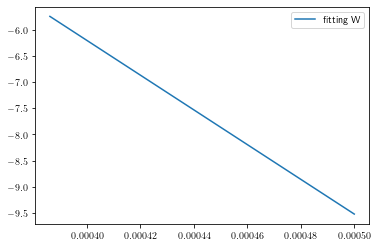

In [103]:
plt.plot(xw,yw, label='fitting W')
pS=np.exp(yr)*0.00131579 #mmhg to atm

pW=np.exp(yw)
#print(pS)
#print(pW)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

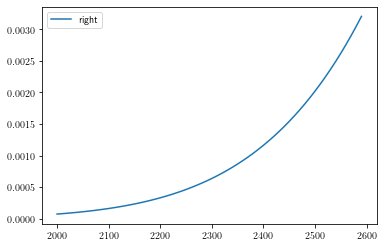

In [104]:

#print(1/xw)
#print(pW)
plt.plot(1/xw,pW, label='right')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

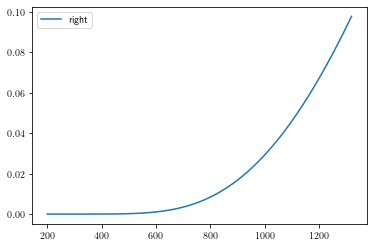

In [105]:

plt.plot(1/xr,pS, label='right')
#print(1/xr)
#print(pS)
plt.legend()
plt.show

In [106]:
D=[]
E=[]

I=np.sqrt(IA)*np.sqrt(IB)*np.sqrt(IC)
A=np.log((((2*pi*m)**(3/2))*((kk*T)**(5/2)))/(p0*(h**3)))
B=np.log(np.sqrt(pi)/sigma)+ np.log((((8*pi*kk*T)/(h**2))**(3/2))*I)
temp=numpy.array([(np.log(1-math.exp(-(hbar*i)/(kk*T)))) for i in wSe])
C=np.sum(temp)
mu_0=-k*T*(A+B-C)
for i in pS:
       
        E.append(k*T*np.log(i/p01))
 
        
#
#print('E',E)
#print('mu_0', mu_0)
temp2=numpy.array([(hb*i)/(2) for i in wSe])
D=np.sum(temp2)
#print('D',D)
mu_S8=mu_0 + np.array(E) + D + ESe8 
#print('mu_S8',mu_S8)

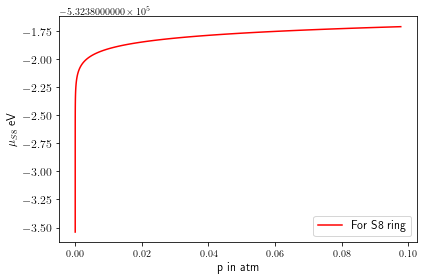

In [107]:
#p=arange(1.89e-3,1.89e+3,1)

plt.plot(pS,mu_S8, 'red', label='For S8 ring')
plt.xlabel('p in atm', fontsize=12)
plt.ylabel(r'$\mu_{S8}$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

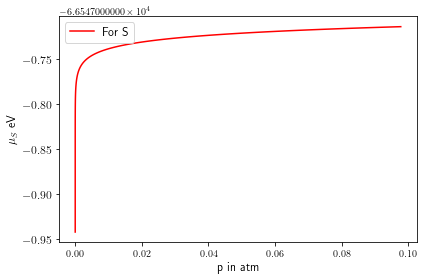

In [108]:
mu_S=np.array(mu_S8)/8
#p=arange(1.89e-3,1.89e+3,1)
plt.plot(pS,mu_S, 'red', label='For S')
plt.xlabel('p in atm', fontsize=12)
plt.ylabel(r'$\mu_S$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('muS_p.png',dpi=400)

In [109]:
def free_energy(omega):
   F=[]
  
   omega = numpy.array(omega)
   #for p in arange(1.89e-3,1.89e+3,e-1):
      
   temp3=numpy.array([(hb*i/2 + k*T*np.log(1-math.exp(-(hb*i)/(k*T)))) for i in omega])
   F.append(numpy.sum(temp3))


   return F

In [110]:
def DeltaF(X,Y):
   deltaF=[]
   F1=free_energy(X)
   F2=free_energy(Y)
   zip_object = zip(F1, F2)
   for i, j in zip_object:    
       deltaF.append(i-j)
   return deltaF 

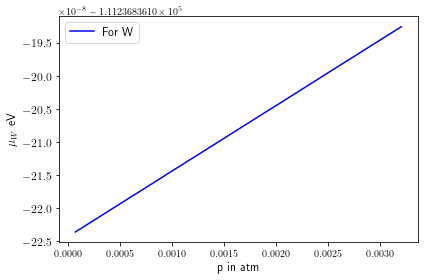

In [111]:
Fphon=free_energy(wW)
Fphon=np.array(Fphon)
#print(Fphon)
#print(EW)

V= 0.3133E+02 # volume of unitcell A^3
#print(pW*V*6.3242093e-07)
mu_W=[]
for i in pW:
       
        mu_W.append((1/2)*(EMo+np.array((i*V*6.3242093e-07))+ Fphon))
 
#pp= 7.329633135876344e-05 # at 2000 k
#PV=pW*V*6.3242093e-07 # to eV
#mu_W=(1/2)*(EW+PV+ Fphon)

plt.plot(pW,mu_W, 'blue', label='For W')
#print(mu_W)
plt.xlabel('p in atm', fontsize=12)
plt.ylabel(r'$\mu_{W}$ eV', fontsize=12)
plt.legend(fontsize=12)
#plt.ylimit(-452698.820,)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('muW_p.png',dpi=400)

In [112]:
addSe = numpy.array([E1-E0-a + DeltaF(w1,w0) for a in (mu_S)])
VSe =  numpy.array([E2-E0+a + DeltaF(w2,w0) for a in mu_S])
VSe2 =  numpy.array([E3-E0+2*a + DeltaF(w3,w0) for a in mu_S])
VSe22 =  numpy.array([E4-E0+2*a + DeltaF(w4,w0) for a in  mu_S])
VMo =  numpy.array([E5-E0+a + DeltaF(w5,w0) for a in mu_W])
np.savetxt("high_P.txt",  np.column_stack([pS, addSe, VSe, VSe2, VSe22]) ,delimiter=' ',header='P     addS     VS      VS2      VS22',comments='')


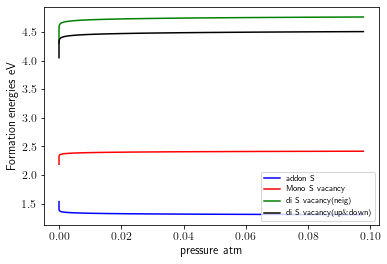

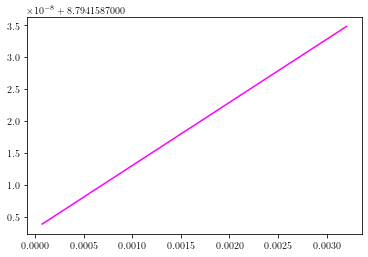

In [113]:
plt.plot(pS, addSe, 'b', label='addon S')
plt.plot(pS, VSe, 'r', label='Mono S vacancy')
plt.plot(pS, VSe22, 'g', label='di S vacancy(neig)') 
plt.plot(pS, VSe2, 'k', label=r'di S vacancy(up$\&$down)')
#plt.plot(pW, VMo, 'magenta', label='Mono W vacany') 
plt.xlabel('pressure atm', fontsize=12)
plt.ylabel('Formation energies eV', fontsize=12)
plt.legend(loc='lower right',fontsize=8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Ef_p.png',dpi=400)
plt.show()
plt.plot(pW, VMo, 'magenta', label='Mono W vacany') 
plt.show()
np.savetxt("addS_1.txt", addSe , fmt="%s")
#print(addS)

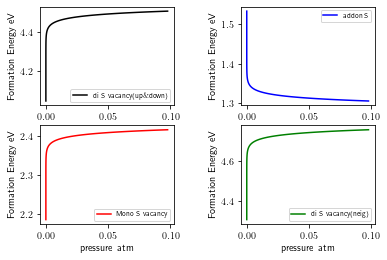

In [114]:
fig, axs = plt.subplots(2, 2)
#p=arange(1.89e-3,1.89e+3,1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.2)
#axs[0, 0].plot(pW, VMo, 'magenta', label='Mono W vacany')

axs[0, 1].plot(pS, addSe, 'b', label='addon S')
axs[0, 1].legend(fontsize=7)
axs[1, 0].plot(pS, VSe, 'r', label='Mono S vacancy')
axs[1, 0].legend(fontsize=7)
axs[1, 1].plot(pS, VSe22, 'g', label='di S vacancy(neig)')
axs[0, 0].plot(pS, VSe2, 'k', label=r'di S vacancy(up$\&$down)')
axs[1, 1].legend(fontsize=7)
axs[0, 0].legend(fontsize=7)
for ax in axs.flat:
    ax.set(xlabel='pressure atm', ylabel='Formation Energy eV')

plt.savefig('Ef_2_p.png',dpi=400) 